In [3]:
import os
import keras
from keras.optimizers import RMSprop, Adam
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%run 'modeling_pipeline/modeling_pipeline.py'

Helper functions loaded successfully!
pipeline ready!


## Exploring Genre Classification with Convolutional Neural Nets

 #### **Let's dive in to the data with a basic Fully connected Model
The Dataset Contains approx. 40,000 images of Book covers from 23 different genre categories**

In [3]:
# we need a list of all genre labels to load in the entire dataset
all_genres = [ g for g in os.listdir('images/train_set/') if g.startswith('.')==False]
all_genres

['Computers & Technology',
 'Childrens-Books',
 'SciFi-Fantasy',
 'Self-Help',
 'Comics & Graphic Novels',
 'Christian',
 'Religion & Spirituality',
 'Humor & Entertainment',
 'Romance',
 'Engineering & Transportation',
 'Sports & Outdoors',
 'Cookbooks, Food & Wine',
 'Business & Money',
 'Literature & Fiction',
 'Arts & Photography',
 'Travel',
 'Crafts & Hobbies',
 'Biographies & Memoirs',
 'Parenting & Relationships',
 'Politics & Social Sciences',
 'Mystery, Thriller & Suspense',
 'Teen-YA',
 'History']

In [6]:
# load in baseline, save to list to pass to pipeline function
%run 'models/baseline_all_genres.py'
models = []
models.append(model)


Multilayer Perceptron - Baselise
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50, 50, 128)       256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
dense_9 (Dense)              (None, 50, 50, 32)        4128      
_________________________________________________________________
dense_10 (Dense)             (None, 50, 50, 32)        1056      
_________________________________________________________________
dense_11 (Dense)             (None, 50, 50, 32)        1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 80000) 

In [5]:
# additional args to pass to our modeling function
params = {"batch_size": 50,
       "epochs": 10}


run_save_models(models, ['baseline'], all_genres, params, filepath='images/train_set/')

158 images unable to be loaded.
Train on 31280 samples, validate on 7821 samples
Epoch 1/10
 - 228s - loss: 3.0996 - acc: 0.0722 - val_loss: 3.0856 - val_acc: 0.0762
Epoch 2/10
 - 222s - loss: 3.0619 - acc: 0.0944 - val_loss: 3.0764 - val_acc: 0.0867
Epoch 3/10
 - 223s - loss: 3.0166 - acc: 0.1150 - val_loss: 3.0783 - val_acc: 0.0942
Epoch 4/10
 - 223s - loss: 2.9494 - acc: 0.1398 - val_loss: 3.0860 - val_acc: 0.0947
Epoch 5/10
 - 223s - loss: 2.8465 - acc: 0.1761 - val_loss: 3.2028 - val_acc: 0.0913
Epoch 6/10
 - 223s - loss: 2.7117 - acc: 0.2113 - val_loss: 3.2185 - val_acc: 0.0924
Epoch 7/10
 - 223s - loss: 2.5843 - acc: 0.2531 - val_loss: 3.3238 - val_acc: 0.0863
Epoch 8/10
 - 223s - loss: 2.4657 - acc: 0.2846 - val_loss: 3.4725 - val_acc: 0.0877
Epoch 9/10
 - 225s - loss: 2.3625 - acc: 0.3128 - val_loss: 3.5140 - val_acc: 0.0861
Epoch 10/10
 - 225s - loss: 2.2796 - acc: 0.3366 - val_loss: 3.5878 - val_acc: 0.0802
_________________________________________________________________
La

In [7]:
%run 'models/CNN_all_genres.py'
models = []
models.append(model)
# additional args to pass to our modeling function
params = {"batch_size": 50,
       "epochs": 10}


run_save_models(models, ['CNN'], all_genres, params, filepath='images/train_set/')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
__________

(['model_history/CNN/Computers & Technology or Childrens-Books.csv'],
 [array([[   0,    0, 7480],
         [   0,    0,  341],
         [   0,    0,    0]])])

## Interpreting Initial Results

The convolutional neural net performed MUCH faster than the MLP, but it performed worse with both validation accuracy and Loss staying virtually still. 
Let's try giving the convolutional model more information, adding color channels to see if we can improve performance

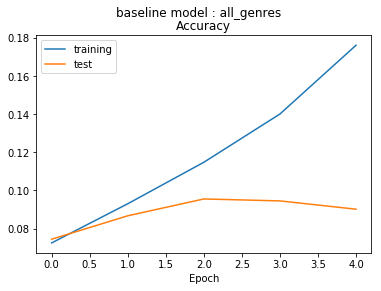

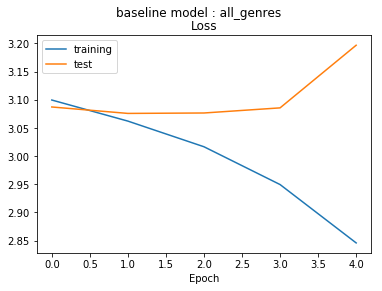

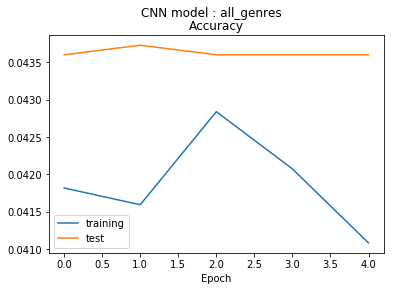

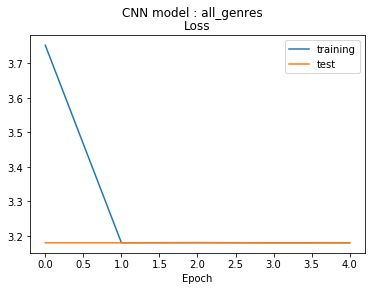

In [13]:
def plot_model_history(csv_file, model_name):
    df = pd.read_csv(csv_file)
    train_loss = df['loss']
    val_loss   = df['val_loss']
    train_acc  = df['acc']
    val_acc    = df['val_acc']
    xc         = range(df.shape[0])
       
    label = csv_file.split('/')[-1][:-4]
    plt.figure()
    
    plt.suptitle('{} : {}'.format(model_name, label))
    plt.title('Accuracy')
    
    plt.plot(xc, train_acc)
    plt.plot(xc, val_acc)
    plt.xlabel('Epoch')
    plt.legend(['training', 'test'])

    plt.figure()
    
    plt.suptitle('{} : {}'.format(model_name, label))
    plt.title('Loss')
    
    plt.plot(xc, train_loss)
    plt.plot(xc, val_loss)
    plt.xlabel('Epoch')
    plt.legend(['training', 'test'])
    plt.show()

plot_model_history('model_history/baseline/all_genres.csv', 'baseline model')
plot_model_history('model_history/CNN/all_genres.csv', 'CNN model')

In [10]:
%run 'models/CNN_all_genres_RGB.py'
models = []
models.append(model)
run_save_models(models, ['CNN'], all_genres, params, filepath='images/train_set/', grayscale=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 64)          0         
__________

(['model_history/CNN/Computers & Technology or Childrens-Books.csv'],
 [array([[   0,    0, 7480],
         [   0,    0,  341],
         [   0,    0,    0]])])

## Note on Color:
Color did not seem to have an effect on model performance however results from the original paper indicate that color design choices seem to have some relationship to genre. Our poor results likely stemm from limitations on memory for load the image above a certain size Limit. Furthermore, Keras does not have an implementation of the pre trained model used in the paper (Alex-net)

Let's take a look at some image samples to select a simpler test for our baseline

# One to One Genre tesing


In [5]:
# let's run the base test of comics vs Travel to see if the model can separate out images belonging to VERY different classes in terms of visual features.
comic_images = load_images('images/train_set/', ["Comics & Graphic Novels"], IMG_SIZE=150)[0]
travel_images = load_images('images/train_set/', ["Travel"], IMG_SIZE=150)[0]


0 images unable to be loaded.
0 images unable to be loaded.


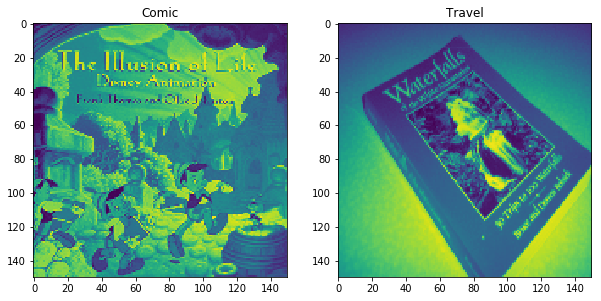

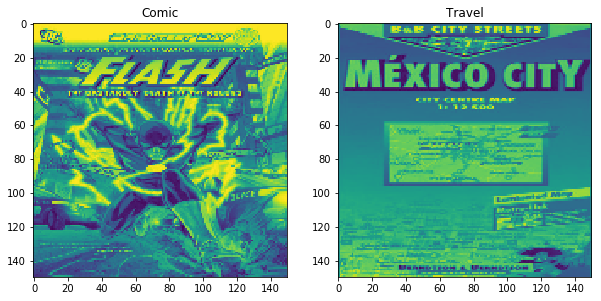

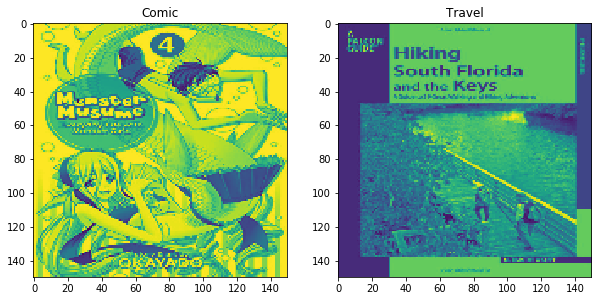

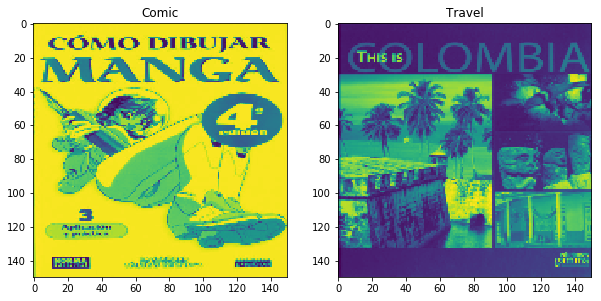

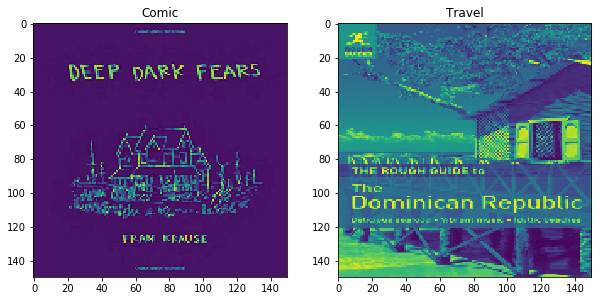

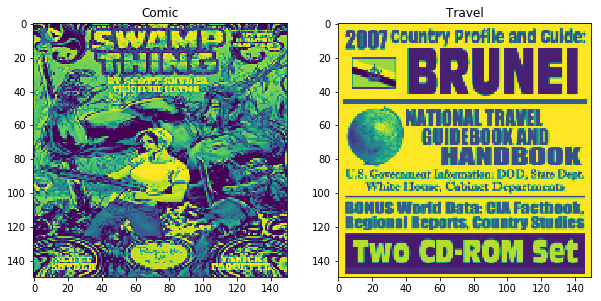

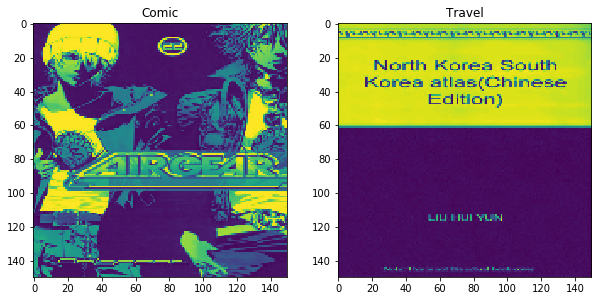

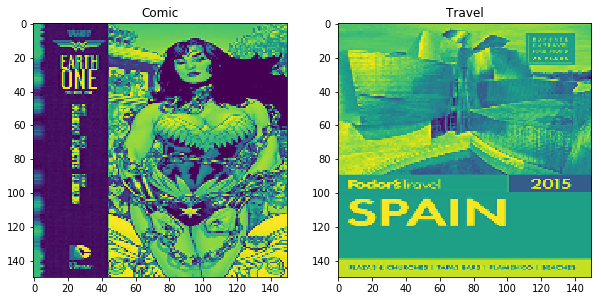

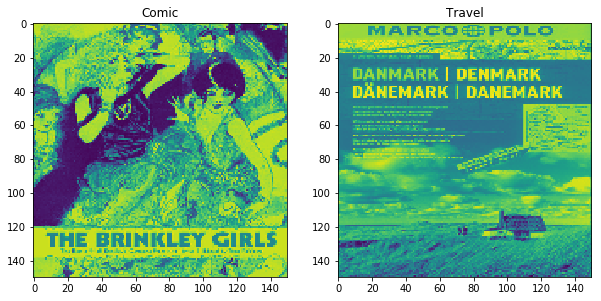

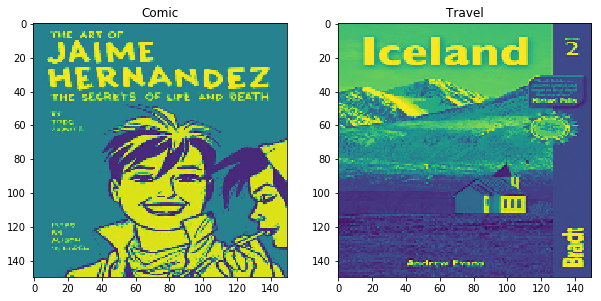

In [17]:
for img1, img2 in zip(comic_images[:10], travel_images[:10]):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Comic')
    plt.imshow(img1)

    plt.subplot(1, 2, 2)
    plt.title("Travel")
    plt.imshow(img2)

In [18]:
%run 'models/baseline.py'
models_list = []
models_list.append(model)
%run 'models/CNN.py'
models_list.append(model)
res = run_save_models(models_list, ['baseline', 'CNN'], ['Comics & Graphic Novels', 'Travel'], params, filepath='images/train_set/')

Multilayer Perceptron - Baselise
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50, 50, 128)       256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
dense_30 (Dense)             (None, 50, 50, 32)        4128      
_________________________________________________________________
dense_31 (Dense)             (None, 50, 50, 32)        1056      
_________________________________________________________________
dense_32 (Dense)             (None, 50, 50, 32)        1056      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 80000) 

## Observations

The Convolutional Model performed much better than the baseline, let's run Comics against all other genres to test of learnability of features

In [14]:
# create tests for comics to each genre
comics_compare = [['Comics & Graphic Novels', genre] for genre in all_genres if genre != "Comics & Graphic Novels"]

In [16]:
# parameters for pipeline, re-load model for each comparision to avoid ccorruption of model performance

params = {"batch_size": 50,
       "epochs": 10}

results = []
for test in comics_compare:
    models_list = []
    %run 'models/CNN.py'
    models_list.append(model)
    res = run_save_models(models_list, ['CNN'], test, params, filepath='images/train_set/')[0]
    results.append(res)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_157 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 3, 3, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_189 (Conv2D)          (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 3, 3, 64)          0         
__________

## Model Results


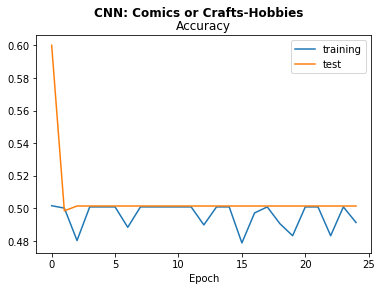

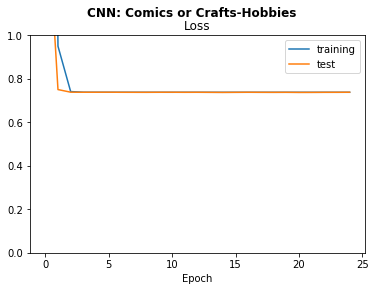

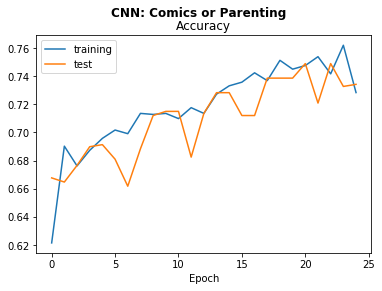

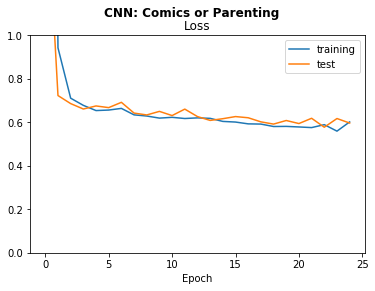

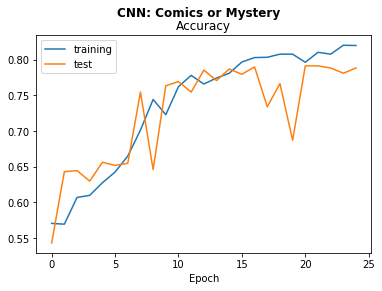

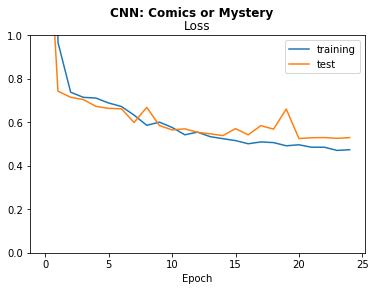

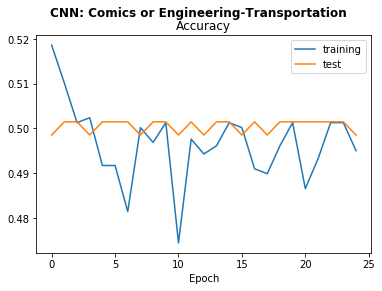

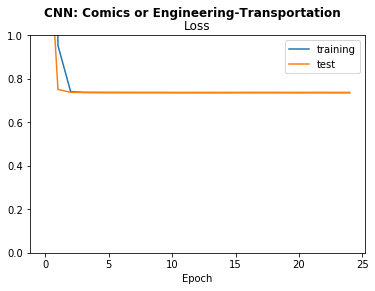

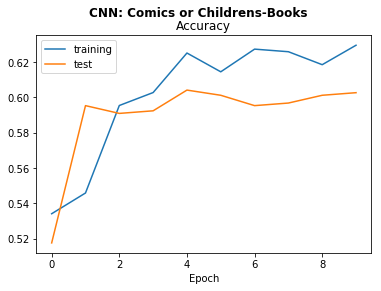

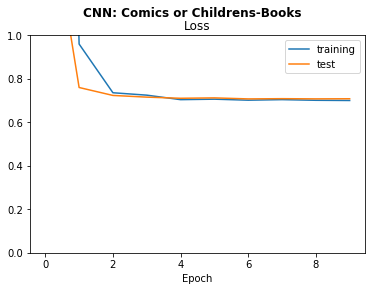

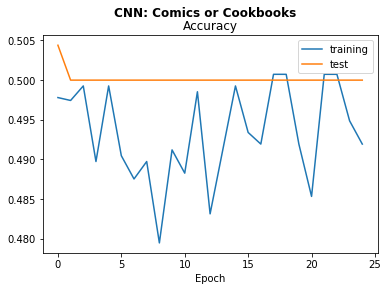

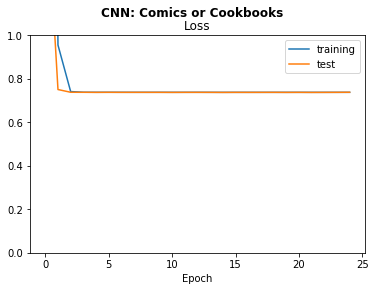

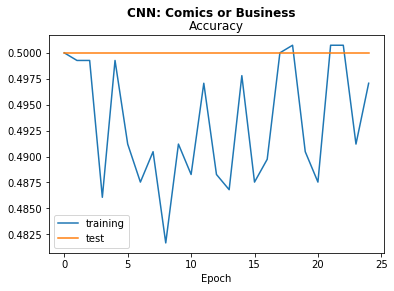

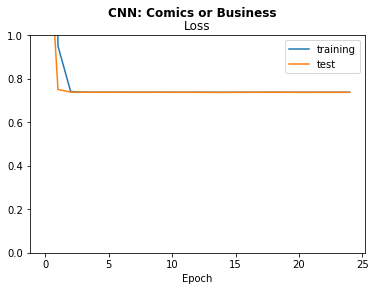

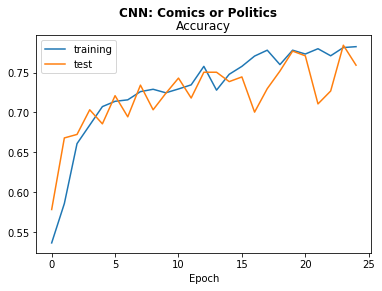

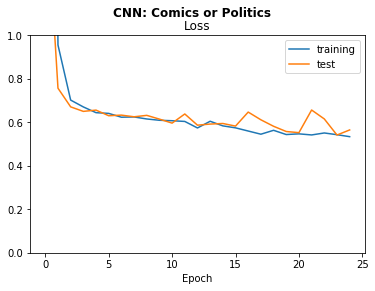

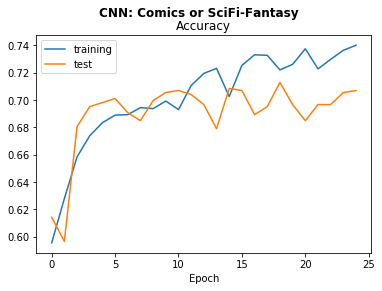

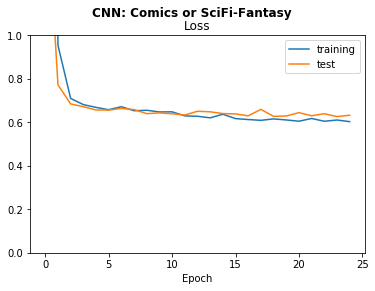

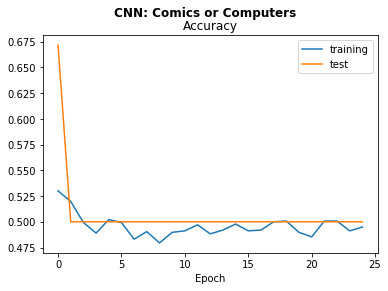

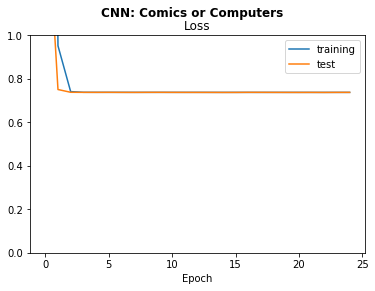

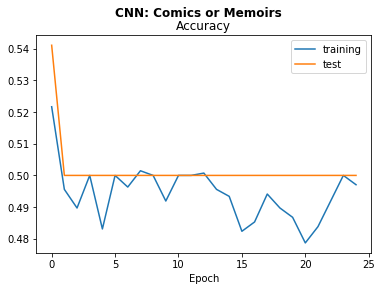

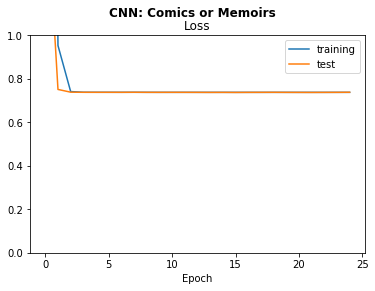

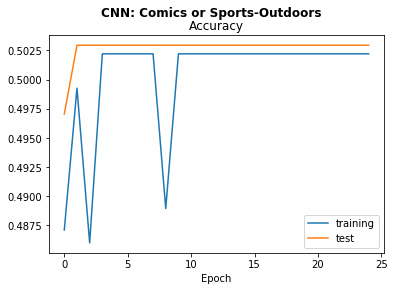

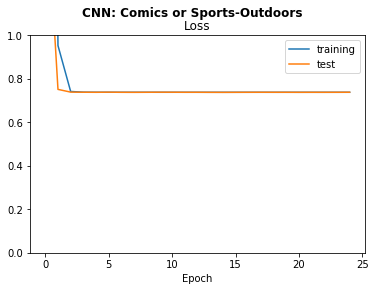

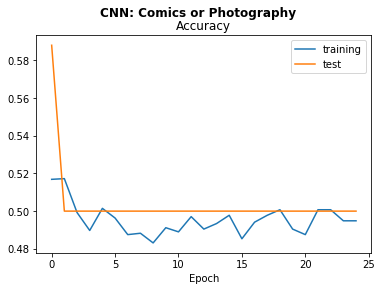

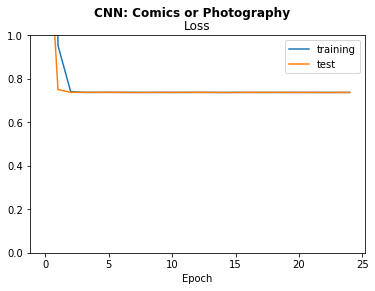

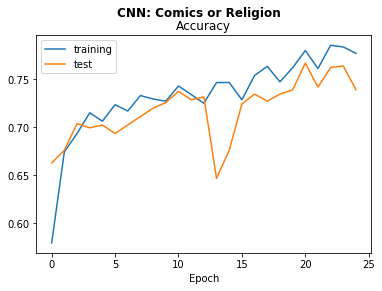

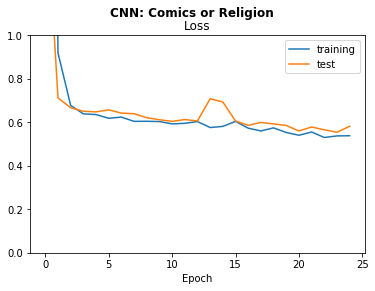

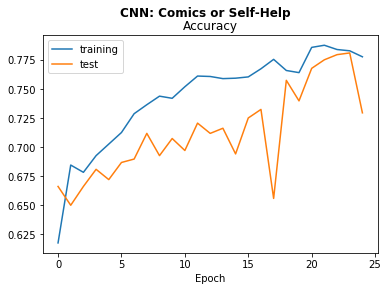

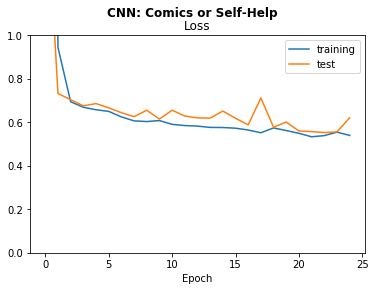

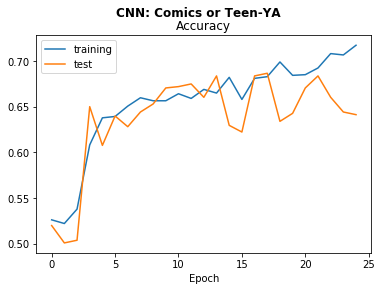

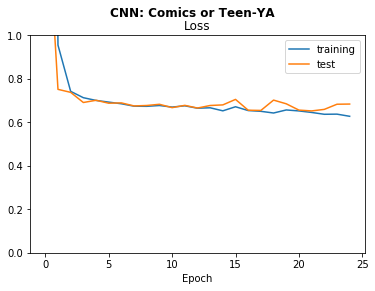

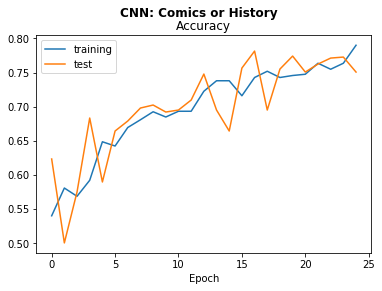

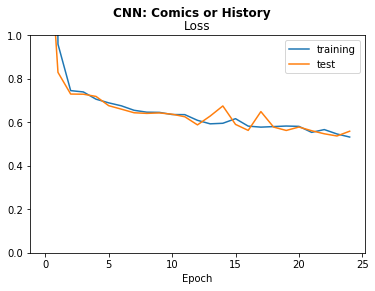

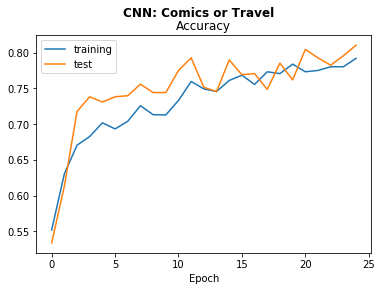

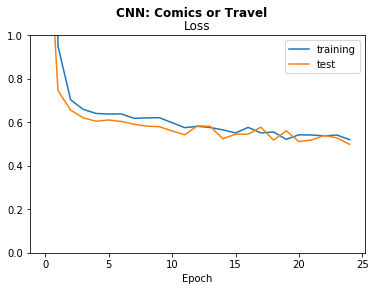

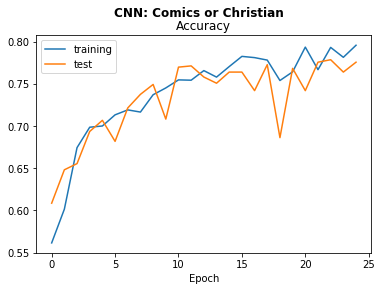

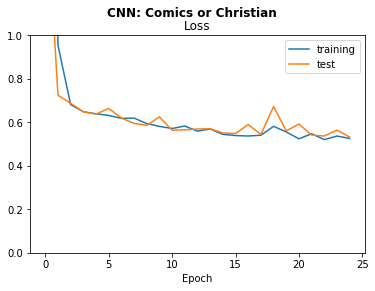

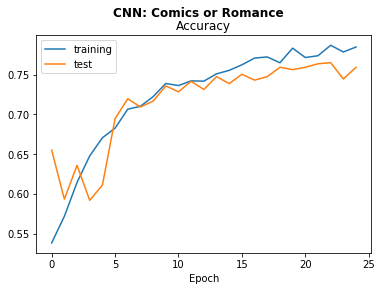

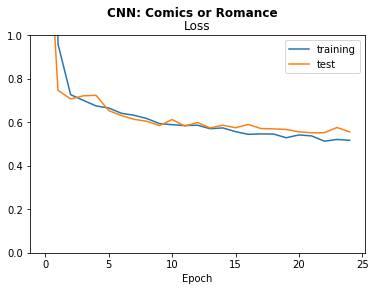

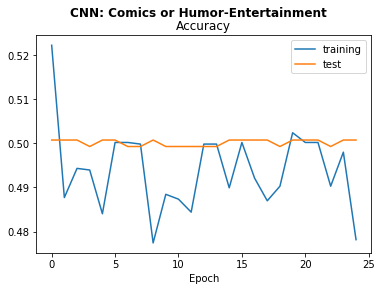

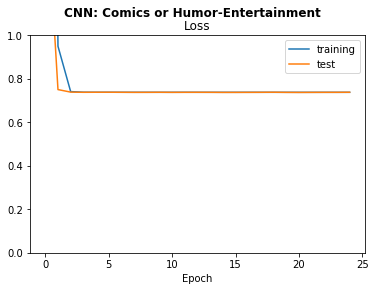

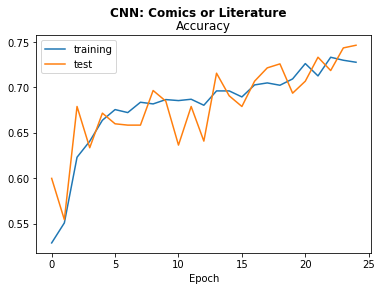

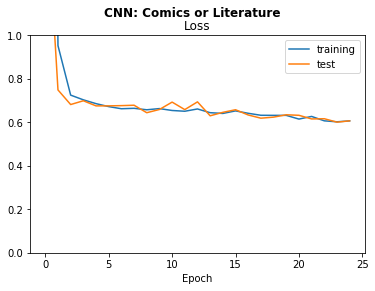

In [6]:
# load modified plotting function for easy looping
% run 'modeling_pipeline/plotting_function.py'

models =["CNN"]

tests = [test for test in os.listdir('model_history/CNN/') if test.startswith('Comics or')]

namespace = globals()
for i, test in enumerate(tests):
    for model in models:
        file_path = os.path.join('model_history/', '{}/{}'.format(model,test))
        plot_model_history(file_path, model, test)
        namespace['df_%d' % i] = pd.read_csv(file_path, index_col=0)

##  results seems to vary from genre to genre, let's plot best results from each test 

In [7]:
import seaborn as sns
import matplotlib.ticker as mtick

results = []
for i in range(len(tests)):
    results.append((namespace['df_%d' % i]['val_acc'].max()))

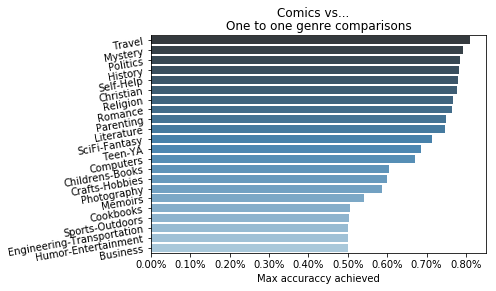

In [8]:
baseline_results = pd.Series(results, index=[test.split(' or ')[-1][:-4] for test in tests])
fig, ax = plt.subplots()
data = baseline_results.sort_values(ascending=False)
sns.barplot(data, data.index, palette='Blues_d', orient='h')
fmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.yticks(rotation=10)
plt.xlabel('Max accuraccy achieved')
plt.title('One to one genre comparisons')
plt.suptitle('Comics vs...')
plt.show()

### **Note:** 
The above testing and modeling is the result of numerous iterations and modeling of varied genre comparisons of the book cover dataset. For reference, please refer to additional  modeling results in the sub directory, model_history

## Findings
Original data scrape from Github contains coerced labels of principal genres for multi genre titles. Furthermore, several class labels encompass multiple sub genres. Unsurprisingly, the classification of these broader categories proves more difficult to predict. 

ADDITIONAL NOTE: according to orginal compilers of the data, a genre was not always provided for an image and in these cases, one was "assigned at random" this is a likely a contributing factor to the poor performance of the certain clases.